# Shreeya Pahune
## 2018113011

# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing tails, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by: 
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have: 
$$ Prob(x<M_n<y) = \sum_{r \in \mathcal Z~\wedge~x<\frac{r}{n}<y} P(r;n) $$



In [58]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.special
import scipy.optimize

## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian, do this by fitting a Gaussian curve to $P(M_n=x)$.

Total Prob is for n = 100 : 0.9999999999999998
[0.07963887 0.5        0.05012526]


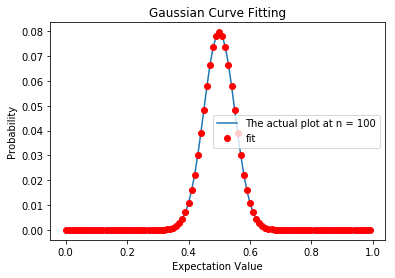

In [98]:
def gaussian(x, a, x0, sigma):
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

def x_vs_Mn(n):
    
    p_head = np.array([])
    nx = np.array([])
    x = np.arange(0 ,1, 1/n)

    for i in x:
        nx = np.append(nx, n*i)
        p_head = np.append(p_head,(scipy.special.comb(n, n*i)/2**n))
    
    print("Total Prob is for n = " + str(n) + " : " + str(sum(p_head)))
    plt.plot(x, (p_head), label = 'The actual plot at n = ' + str(n))
    
    u, v = scipy.optimize.curve_fit(gaussian, x, p_head)
    print(u)
    plt.plot(x, gaussian(x, *u), 'ro', label='fit')
    
#Function calls for multiple n:

n = 100
x_vs_Mn(n)


plt.title("Gaussian Curve Fitting")
plt.xlabel("Expectation Value")
plt.ylabel("Probability")
plt.legend()
plt.show()


## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$

Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

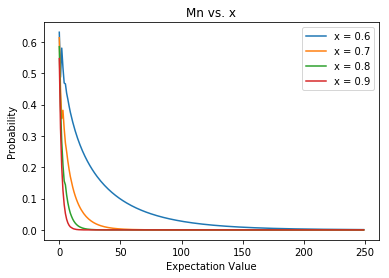

In [122]:
def Mn_greater(x):
    
    p_head = np.zeros(250)
    n=250

    for i in range(1, n+1):
        for j in np.arange(i*x, i):
            p_head[i-1] += scipy.special.comb(i, j)/2.0**i
               
    plt.plot((p_head), label = 'x = ' + str(x))

#Function calls for multiple x:

expect = [0.6, 0.7, 0.8, 0.9]
for itr in expect:
    Mn_greater(itr)


plt.title("Mn vs. x")
plt.xlabel("Expectation Value")
plt.ylabel("Probability")
plt.legend()
plt.show()

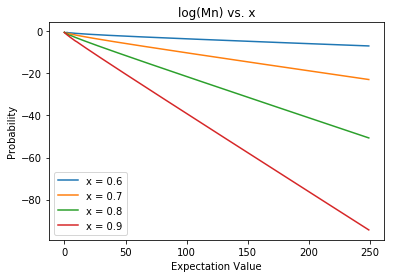

In [126]:
def logMn_greater(x):
    
    p_head = np.zeros(250)
    n=250

    for i in range(1, n+1):
        for j in np.arange(i*x, i):
            p_head[i-1] += scipy.special.comb(i, j)/2.0**i
               
    plt.plot(np.log(p_head), label = 'x = ' + str(x))

#Function calls for multiple x:

expect = [0.6, 0.7, 0.8, 0.9]
for itr in expect:
    logMn_greater(itr)


plt.title("log(Mn) vs. x")
plt.xlabel("Expectation Value")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Task-3: 
Note that for large $N$, the above plots are linear. 
Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

[-0.02443617 -1.00655609]
[-0.08745426 -1.25462683]
[-0.19817751 -1.33098717]
[-0.37350911 -1.20878965]


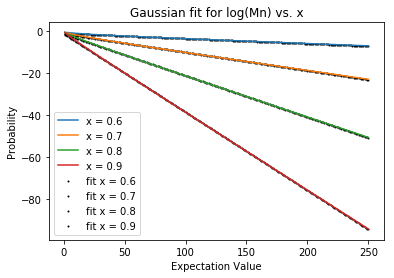

In [157]:
def stline(x, m, c):
    return m*x + c

def logMn_greater(x):
    
    p_head = np.zeros(250)
    n=250

    for i in range(1, n+1):
        for j in np.arange(i*x, i):
            p_head[i-1] += scipy.special.comb(i, j)/2.0**i
               
    plt.plot(np.arange(1, 251), np.log(p_head), label = 'x = ' + str(x))
    
    u, v = scipy.optimize.curve_fit(stline, np.arange(1, 251), np.log(p_head))
    print(u)
    plt.scatter(np.arange(1, 251), stline(np.arange(1, 251), *u),label= 'fit ' + 'x = '+ str(x), s=1, c= 'k')
    

#Function calls for multiple x:

expect = [0.6, 0.7, 0.8, 0.9]
for itr in expect:
    logMn_greater(itr)


plt.title("Gaussian fit for log(Mn) vs. x")
plt.xlabel("Expectation Value")
plt.ylabel("Probability")
plt.legend()
plt.show()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by 
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$ 
with $x(0)=0$.

Plot a one realisation of $x(t)$ for $t\in[0,100]$


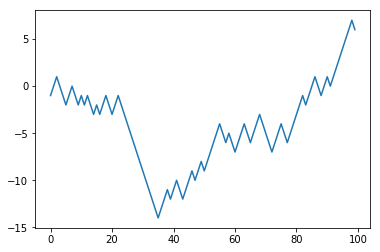

In [31]:
from random import seed
from random import random
from matplotlib import pyplot
seed(1)

random_walk = list()
random_walk_sq = list()
random_walk.append(-1 if random() < 0.5 else 1)
random_walk_sq.append(1)

for i in range(1, 100):
    movement = -1 if random() < 0.5 else 1
    value = random_walk[i-1] + movement
    random_walk.append(value)
    random_walk_sq.append(value**2)
    
pyplot.plot(random_walk)
pyplot.show()

## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$? 
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

In [32]:
print(sum(random_walk))
print(sum(random_walk_sq))

-422
3826


## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imangine that $x=M$ is the location of jail, where once the 'drunk' random walker reaches, is trapped for ever. 

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$. 

Compute $y_M(t)$ by generating a sample of random walks. Comment.

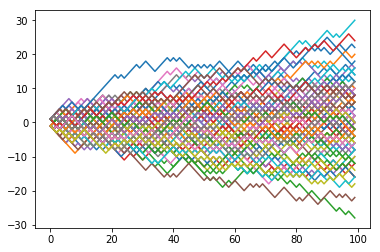

In [52]:
def randomwalk_trap(m):
    for i in range(1, 100):    
        random_walk = list()
        random_walk_sq = list()
        random_walk.append(-1 if random() < 0.5 else 1)
        random_walk_sq.append(1)

        for i in range(1, 100):
            movement = -1 if random() < 0.5 else 1
            if (movement == m):
                flag = 1
                svalue = value
                random_walk.append(svalue)
            else:
                value = random_walk[i-1] + movement
                random_walk.append(value)
                
        pyplot.plot(random_walk)
pyplot.show()

randomwalk_trap(10)